# Stima dei parametri di Gumbel per la stazione di Bieno

Autori: Alessandro Lagrecacolonna, Marco Feltrin, Niccolò Schiavi Cappello

## Metodo dei momenti

In [96]:
import os                                     #servono tutte per elaborare i dati, os permette di vedere i file
import math
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline                          
import matplotlib.pyplot as plt
import matplotlib
import numpy as np                           #comando proprio di jupiter, serve a fare le figure inline
import plotly.express as px
from numpy import linspace
from scipy.stats import genextreme,gumbel_r
from scipy.stats import norm
from pylab import plot,show,hist,figure,title
from scipy.optimize import least_squares

In [45]:
plt.rc('xtick', labelsize=15)                #sono comandi globali per tutto il notebook
plt.rc('ytick', labelsize=15)

In [62]:
def grafici_sovr (d0,d1,d2,d3,d4,d5,d6,d7,ascisse,ordinate,titolo):                               
    ax=gb.plot(color=["grey","brown","orange","red","blue","cyan","green","black"])
    data15=d0.dropna()
    ecdf15 = ECDF(data15)
    ax.plot(data15,ecdf15(data15),"o",c="grey")
    data30=d1.dropna()
    ecdf30 = ECDF(data30)
    ax.plot(data30,ecdf30(data30),"o",c="brown")
    data45=d2.dropna()
    ecdf45 = ECDF(data45)
    ax.plot(data45,ecdf45(data45),"o",c="orange")
    ecdf1h = ECDF(d3.dropna())
    ax.plot(d1,ecdf1h(d1),'o',c="red")
    data3h=d4.dropna()
    ecdf3h = ECDF(data3h)
    ax.plot(data3h,ecdf3h(data3h),"o",c="blue")
    data6h=d5.dropna()
    ecdf6h = ECDF(data6h)
    ax.plot(data6h,ecdf6h(data6h),"o",c="cyan")
    data12h=d6.dropna()
    ecdf12h = ECDF(data12h)
    ax.plot(data12h,ecdf12h(data12h),"o",c="green")
    data24h=d7.dropna()
    ecdf24h = ECDF(data24h)
    ax.plot(data24h,ecdf24h(data24h),"o",c="black")
    ax.set_title(str(titolo))
    ax.set_xlabel(str(ascisse))
    ax.set_ylabel(str(ordinate))
    
#permette di disegnare i grafici sovrapponendo i dati alle ecdf
#i dati di in input sono gli indici delle colonne del dataframe con durata e precipitazione, i titoli degli assi e del grafico vanno dati come stringa
#si ottiene un grafico con sovrapposti i dati ad ecdf   

In [47]:
data=pd.read_pickle("massimi_bieno")
data

,15 min,30 min,45 min,1 ora,3 ore,6 ore,12 ore,24 ore
anno,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971.0,10.2,11.8,14.6,19.8,41.4,70.0,88.0,121.0
1972.0,13.2,15.8,16.6,26.6,33.4,35.8,45.0,63.8
1973.0,18.8,19.8,21.6,22.0,24.4,38.6,49.0,71.8
1974.0,10.4,14.6,17.6,NaN,NaN,NaN,NaN,NaN
1975.0,17.0,23.2,NaN,26.4,29.8,33.4,50.2,90.5
1976.0,NaN,41.6,NaN,45.6,48.6,50.4,75.2,127.2
1977.0,18.0,19.2,26.0,27.0,32.4,45.0,60.4,67.6
1978.0,18.4,18.6,18.8,20.2,25.8,43.4,71.0,107.0


In [48]:
means=data.mean()
means

15 min    14.205405
30 min    18.107692
45 min    19.843243
1 ora     22.857895
3 ore     32.931579
6 ore     43.594737
12 ore    60.473684
24 ore    85.018421
dtype: float64

Text(0, 0.5, 'precipitazioni (mm)')

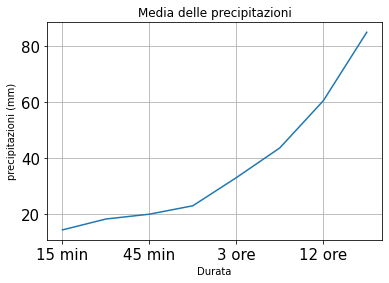

In [49]:
ax=means.plot()                                          #si disegnano le medie su un grafico con mm su y e su x le ore
ax.grid(True)                                            #con gli alti comandi si associa il disegno a delle variabili, grid crea la griglia di rappresentaz.
#ax.legend(loc='right')
ax.set_title('Media delle precipitazioni')
ax.set_xlabel('Durata')                                  #da i nomi agli assi
ax.set_ylabel('precipitazioni (mm)')

In [50]:
variances=data.var()      #calcola la varianza, serve per i metodi dei momenti
variances

15 min     21.505526
30 min     46.772308
45 min     45.969189
1 ora      69.314395
3 ore      51.624381
6 ore      62.416188
12 ore    184.539289
24 ore    449.619381
dtype: float64

<AxesSubplot:title={'center':'varianza'}, xlabel='durata', ylabel='altezza [mm]'>

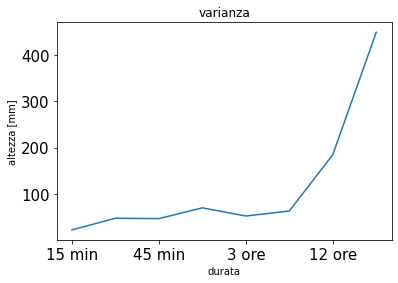

In [51]:
variances.plot(xlabel=('durata'),ylabel=('altezza [mm]'),title=('varianza'))

il grafico rappresenta l'andamento della varianza

In [52]:
stds=data.std()
stds 

15 min     4.637405
30 min     6.839028
45 min     6.780058
1 ora      8.325527
3 ore      7.185011
6 ore      7.900392
12 ore    13.584524
24 ore    21.204230
dtype: float64

In [53]:
def param_gumbel (m,s):                                                             #prende in input media e dev. std e restituisce i parametri a e b in un dataframe
    x=math.sqrt(6)/math.pi                                                          #è un parametro numerico: 6/sqrt.pi
    EulerGamma=0.577215664901532860606512090                                        #costante eulero mascheroni
    return pd.DataFrame([m-x*EulerGamma*s,x*s],index=["a","b"])

#nel dataframe ci sono i valori per tutte le durate

In [54]:
momenti=param_gumbel(means,stds)
momenti

,15 min,30 min,45 min,1 ora,3 ore,6 ore,12 ore,24 ore
a,12.118326,15.029766,16.791856,19.110965,29.697942,40.03914,54.359926,75.475389
b,3.615770,5.332368,5.286390,6.491387,5.602130,6.15991,10.591810,16.532871


In [55]:
momenti.to_pickle("abs_m")

In [94]:
def gumbel(x,abs_d,col):                                                   #input:intervallo valori, stima parametri, indice colonna
    return np.exp(-np.exp(-(x-abs_d[col]["a"])/abs_d[col]["b"]))
t_rain=np.linspace(data.min()[0],data.max()[7],100)                        #identifica massimo e minimo valore di precipitazione
def dataframe_gumbel (data,abs_,t_rain):
    gb=pd.DataFrame(columns=[],index=[t_rain])                             #crea un dataframe vuoto con righe coi valori di pioggia
    for v in data.columns:                                                 #itera sui valori delle colonne per creare il dataframe
        gb[v]=gumbel(t_rain,abs_,v)
    gb.index=t_rain   
    return gb

#la funzione prende in input il file dei dati, il file contenente la stima dei parametri di gumbel per ogni durata e l'intervallo totale di pioggia
#restituisce un dataframe in cui si associano alle altezze i valori di gumbel riferiti ad ogni durata

In [95]:
abs_m=pd.read_pickle("abs_m")
gb=dataframe_gumbel(data,abs_m,t_rain)
gb

,15 min,30 min,45 min,1 ora,3 ore,6 ore,12 ore,24 ore
6.600000,0.010046,0.007757,0.001033,0.001037,1.524451e-27,1.157331e-99,3.525355e-40,1.017570e-28
7.850505,0.038563,0.021421,0.004396,0.003458,3.532821e-22,1.741088e-81,8.723236e-36,1.113655e-26
9.101010,0.099895,0.047837,0.013790,0.009334,6.915155e-18,1.198126e-66,6.996709e-32,8.657384e-25
10.351515,0.195910,0.090313,0.034000,0.021172,1.874498e-14,1.549153e-54,2.062222e-28,4.901108e-23
11.602020,0.315533,0.149295,0.069316,0.041602,1.045064e-11,1.192487e-44,2.497002e-25,2.067790e-21
...,...,...,...,...,...,...,...,...
125.397980,1.000000,1.000000,1.000000,1.000000,1.000000e+00,9.999990e-01,9.987783e-01,9.523516e-01
126.648485,1.000000,1.000000,1.000000,1.000000,1.000000e+00,9.999992e-01,9.989143e-01,9.557447e-01
127.898990,1.000000,1.000000,1.000000,1.000000,1.000000e+00,9.999994e-01,9.990351e-01,9.589014e-01
129.149495,1.000000,1.000000,1.000000,1.000000,1.000000e+00,9.999995e-01,9.991425e-01,9.618374e-01


Text(0, 0.5, 'P[H<h]')

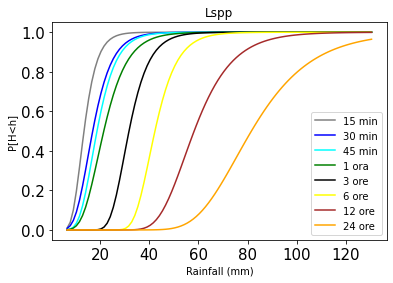

In [58]:
ax=gb.plot(color=["grey","blue","cyan","green","black",'yellow','brown','orange'])
ax.plot()
ax.set_title('Lspp')
ax.set_xlabel('Rainfall (mm)')
ax.set_ylabel('P[H<h]')

#restituisce un grafico con le curve di possibilità pluviometrica

Si creano due grafici con la sovrapposizione di ecdf e dati empirici per rendere più semplice l'interpretazione

(0.0, 55.0)

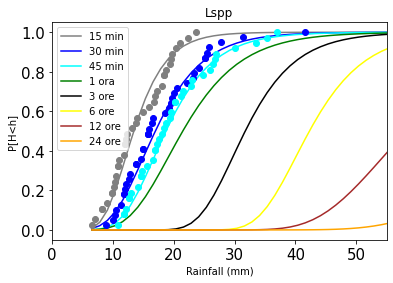

In [66]:
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
ax=gb.plot(color=["grey","blue","cyan","green","black",'yellow','brown','orange'])
data15m=data["15 min"].dropna()                                      
ecdf15m = ECDF(data15m)
ax.plot(data15m,ecdf15m(data15m),"o",c="grey")
data30m=data["30 min"].dropna()                                       
ecdf30m = ECDF(data30m)
ax.plot(data30m,ecdf30m(data30m),"o",c="blue")
ecdf45 = ECDF(data["45 min"].dropna())
ax.plot(data["45 min"],ecdf45(data["45 min"]),'o',c="cyan",label="45 min")
ax.set_title('Lspp')
ax.set_xlabel('Rainfall (mm)')
ax.set_ylabel('P[H<h]')
ax.set_xlim(0,55)

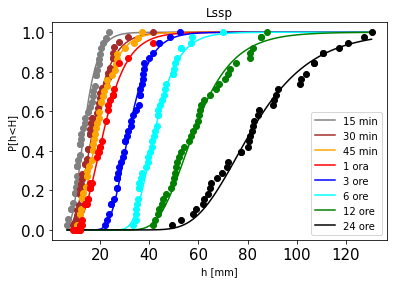

In [67]:
grafici_sovr(data['15 min'],data['30 min'],data['45 min'],data['1 ora'],data['3 ore'],data['6 ore'],data['12 ore'],data['24 ore'], 'h [mm]','P[h<H]','Lssp')

#richiama la funzione definita all'inizio

## Metodo dei minimi quadrati

In [68]:
data

,15 min,30 min,45 min,1 ora,3 ore,6 ore,12 ore,24 ore
anno,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971.0,10.2,11.8,14.6,19.8,41.4,70.0,88.0,121.0
1972.0,13.2,15.8,16.6,26.6,33.4,35.8,45.0,63.8
1973.0,18.8,19.8,21.6,22.0,24.4,38.6,49.0,71.8
1974.0,10.4,14.6,17.6,NaN,NaN,NaN,NaN,NaN
1975.0,17.0,23.2,NaN,26.4,29.8,33.4,50.2,90.5
1976.0,NaN,41.6,NaN,45.6,48.6,50.4,75.2,127.2
1977.0,18.0,19.2,26.0,27.0,32.4,45.0,60.4,67.6
1978.0,18.4,18.6,18.8,20.2,25.8,43.4,71.0,107.0


In [97]:
def fun(x, t, y):                                  
    return np.exp(-np.exp(-(t-x[0])/x[1]))-y                                           #la funzione definisce gumbel, -y è la funzione empirica e i param di g. sono un vettore, è richiesta così dall'algoritmo

x0={"15 min":[12,3],"30 min":[15,5],"45 min":[16,5],"1 ora":[19,6],"3 ore":[29,5],"6 ore":[40,6],"12 ore":[54,10],"24 ore":[75,16]} 
#x0 è un dictionary che associa ad ogni durata dei valori approssimati di a e b 

def p_minq (file,x):
    abs_mq=pd.DataFrame(columns=[],index=["a","b"])                                    #crea un dataframe vuoto con indici a e b
    for v in file.columns:                                                             #il ciclo è iterato sulle colonne del file csv
        ecdfh = ECDF(data[v].dropna())                                                 #calcola ecdf per ogni durata
        t_train=sorted(file[v].dropna())                                               #definisce un campione ed elimina i NAN
        y_train=ecdfh(t_train)                                                         #definisce delle zone di training per deteriminare i valori a e b
        res_lsq_h = least_squares(fun, x[v], args=(t_train, y_train))                  #utilizza i dati di training e i valori approssimati per stimare a e b
        abs_mq[v]=res_lsq_h.x                                                          #crea un dataframe con i valori di a e b per ogni durata  
    return abs_mq

#la funzione prende in input il file con i dati di precipitazione e i valori approssimati di a e b, restituisce un dataframe con a e b
#per far funzionare la function si deve definire un dictionary con chiave la durata come stringa e oggetto una lista dei valori approssimati per quella durata
#i valori approssimati sono prima il valore di a e poi b

In [98]:
abs_mq = p_minq(data,x0)
abs_mq

,15 min,30 min,45 min,1 ora,3 ore,6 ore,12 ore,24 ore
a,11.663214,14.491668,16.238989,18.738757,29.181055,39.539450,53.206385,74.212278
b,4.466666,5.385548,5.417998,6.010352,6.254711,6.408727,11.844914,18.848570


In [71]:
abs_mq.to_pickle("abs_mq")

In [99]:
def gumbel(x,abs_d,col):                                                   #input:intervallo valori, stima parametri, indice colonna
    return np.exp(-np.exp(-(x-abs_d[col]["a"])/abs_d[col]["b"]))
t_rain=np.linspace(data.min()[0],data.max()[7],100)                        #identifica massimo e minimo valore di precipitazione
def dataframe_gumbel (data,abs_,t_rain):
    gb=pd.DataFrame(columns=[],index=[t_rain])                             #crea un dataframe vuoto con righe coi valori di pioggia
    for v in data.columns:                                                 #itera sui valori delle colonne per creare il dataframe
        gb[v]=gumbel(t_rain,abs_,v)
    gb.index=t_rain
    return gb

#la funzione prende in input il file dei dati, il file contenente la stima dei parametri di gumbel per ogni durata e l'intervallo totale di pioggia
#restituisce un dataframe in cui si associano alle altezze i valori di gumbel riferiti ad ogni durata

In [100]:
b=dataframe_gumbel(data,abs_mq,t_rain)
b

,15 min,30 min,45 min,1 ora,3 ore,6 ore,12 ore,24 ore
6.600000,0.044749,0.013180,0.002674,0.000534,8.747230e-17,7.505339e-75,6.121378e-23,2.036256e-16
7.850505,0.095554,0.032322,0.009065,0.002198,7.108808e-14,1.035928e-61,1.028999e-20,2.070513e-15
9.101010,0.169535,0.065818,0.023899,0.006940,1.715574e-11,6.698672e-51,1.035138e-18,1.814122e-14
10.351515,0.261497,0.115663,0.051595,0.017653,1.532018e-09,5.251202e-42,6.560549e-17,1.382766e-13
11.602020,0.362840,0.180846,0.095049,0.037682,6.061780e-08,1.091076e-34,2.743740e-15,9.251414e-13
...,...,...,...,...,...,...,...,...
125.397980,1.000000,1.000000,1.000000,1.000000,9.999998e-01,9.999985e-01,9.977478e-01,9.359779e-01
126.648485,1.000000,1.000000,1.000000,1.000000,9.999998e-01,9.999987e-01,9.979732e-01,9.399616e-01
127.898990,1.000000,1.000000,1.000000,1.000000,9.999999e-01,9.999990e-01,9.981761e-01,9.437049e-01
129.149495,1.000000,1.000000,1.000000,1.000000,9.999999e-01,9.999992e-01,9.983587e-01,9.472215e-01


Anche qui si creano due grafici distinti per i valori sub orari e pluriorari

Text(0, 0.5, 'P[H<h]')

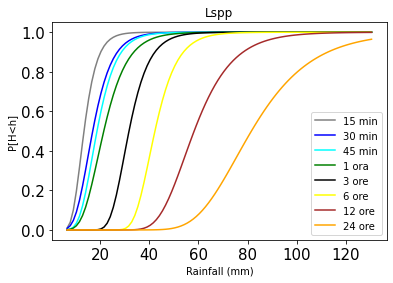

In [101]:
ax=gb.plot(color=["grey","blue","cyan","green","black",'yellow','brown','orange'])
ax.plot()
ax.set_title('Lspp')
ax.set_xlabel('Rainfall (mm)')
ax.set_ylabel('P[H<h]')

#restituisce un grafico con le curve di possibilità pluviometrica

(0.0, 55.0)

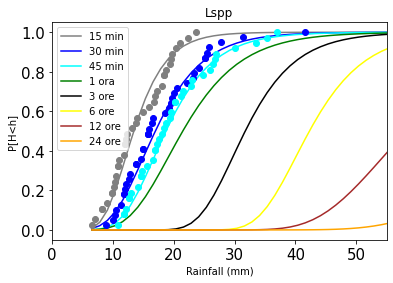

In [102]:
ax=gb.plot(color=["grey","blue","cyan","green","black",'yellow','brown','orange'])
ecdf15 = ECDF(data["15 min"].dropna())
ax.plot(data["15 min"],ecdf15(data["15 min"]),'o',c="grey",label="45 min")
data30m=data["30 min"].dropna()                                      
ecdf30m = ECDF(data30m)
ax.plot(data30m,ecdf30m(data30m),"o",c="blue")
data45m=data["45 min"].dropna()                                       
ecdf45m = ECDF(data45m)
ax.plot(data45m,ecdf45m(data45m),"o",c="cyan")
ax.set_title('Lspp')
ax.set_xlabel('Rainfall (mm)')
ax.set_ylabel('P[H<h]')
ax.set_xlim(0,55)

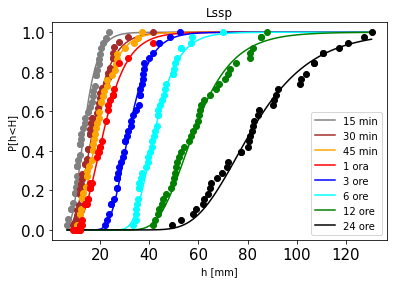

In [81]:
grafici_sovr(data["15 min"],data['30 min'],data['45 min'],data['1 ora'],data['3 ore'],data['6 ore'],data['12 ore'],data['24 ore'], 'h [mm]','P[h<H]','Lssp')

## Metodo della massima verosimiglianza

In [82]:
def p_maxv(file):
    abs_mle=pd.DataFrame(columns=[], index=["a","b"])         #a corrisponde alla moda in gumbel 
    for val in file.columns:                                  #itera sui valori delle durate
        samp = file[val].dropna()                             #definisce un campione corrispondente alla colonna del file ed elimina i NAN
        paramh = gumbel_r.fit(samp)                           #ricava i parametri di gumbel con max verosimiglianza
        abs_mle[val]=paramh                                   #crea una nuova colonna del dataframe con i valori a e b per durata
    return (abs_mle)

#prende in input un file con i dati delle precipitazioni, crea un dataframe vuoto e per ogni durata calcola a e b con max verosim.
#calcola a e b basandosi sulle colonne del file
#crea un dataframe con indici a e b e le colonne sono associate ad una durata specifica

In [83]:
abs_mle=p_maxv(data)
abs_mle

,15 min,30 min,45 min,1 ora,3 ore,6 ore,12 ore,24 ore
a,11.987714,15.113638,16.811388,19.235400,29.629658,40.098197,54.173507,74.997963
b,3.913835,4.943791,5.027258,5.988326,5.699094,5.822801,10.682383,17.723370


In [84]:
abs_mle.to_pickle("abs_mle")

In [85]:
def gumbel(x,abs_d,col):                                                   #input:intervallo valori, stima parametri, indice colonna
    return np.exp(-np.exp(-(x-abs_d[col]["a"])/abs_d[col]["b"]))
t_rain=np.linspace(data.min()[0],data.max()[7],100)                        #identifica massimo e minimo valore di precipitazione
def dataframe_gumbel (data,abs_,t_rain):
    gb=pd.DataFrame(columns=[],index=[t_rain])                             #crea un dataframe vuoto con righe coi valori di pioggia
    for v in data.columns:                                                 #itera sui valori delle colonne per creare il dataframe
        gb[v]=gumbel(t_rain,abs_,v)
    gb.index=t_rain
    return gb

#gb è un dataframe con indice l'altezza di pioggia, colonne la durata e i valori sono in valore di gumbel associata ad una determinata altezza 

In [86]:
c=dataframe_gumbel(data,abs_mle,t_rain)
c


,15 min,30 min,45 min,1 ora,3 ore,6 ore,12 ore,24 ore
6.600000,0.019038,0.003712,0.000489,0.000262,1.984230e-25,1.404916e-137,4.830633e-38,2.527098e-21
7.850505,0.056251,0.012965,0.002620,0.001239,1.460112e-20,3.948395e-111,6.401957e-34,6.394745e-20
9.101010,0.123584,0.034241,0.009703,0.004373,1.181243e-16,8.581613e-90,2.973233e-30,1.298467e-18
10.351515,0.218930,0.072788,0.026929,0.012173,1.623152e-13,1.402792e-72,5.433251e-27,2.147621e-17
11.602020,0.331686,0.130730,0.059692,0.027941,5.371996e-11,1.080600e-58,4.330671e-24,2.934080e-16
...,...,...,...,...,...,...,...,...
125.397980,1.000000,1.000000,1.000000,1.000000,9.999999e-01,9.999996e-01,9.987292e-01,9.434521e-01
126.648485,1.000000,1.000000,1.000000,1.000000,1.000000e+00,9.999996e-01,9.988695e-01,9.472008e-01
127.898990,1.000000,1.000000,1.000000,1.000000,1.000000e+00,9.999997e-01,9.989943e-01,9.507076e-01
129.149495,1.000000,1.000000,1.000000,1.000000,1.000000e+00,9.999998e-01,9.991054e-01,9.539871e-01


Text(0, 0.5, 'P[H<h]')

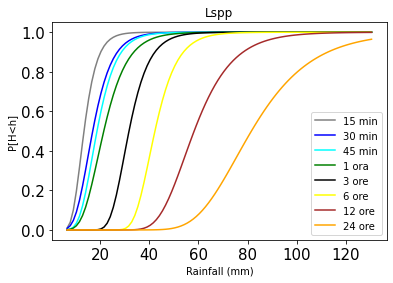

In [88]:
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15) 
ax=gb.plot(color=["grey","blue","cyan","green","black",'yellow','brown','orange'])
ax.plot()
ax.set_title('Lspp')
ax.set_xlabel('Rainfall (mm)')
ax.set_ylabel('P[H<h]')

#restituisce un grafico con le curve di possibilità pluviometrica

(0.0, 60.0)

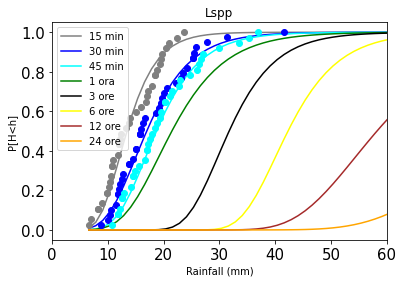

In [91]:
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
ax=gb.plot(color=["grey","blue","cyan","green","black",'yellow','brown','orange'])
ecdf15 = ECDF(data["15 min"].dropna())
ax.plot(data["15 min"],ecdf15(data["15 min"]),'o',c="grey",label="45 min")
data30m=data["30 min"].dropna()                                      
ecdf30m = ECDF(data30m)
ax.plot(data30m,ecdf30m(data30m),"o",c="blue")
data45m=data["45 min"].dropna()                                       
ecdf45m = ECDF(data45m)
ax.plot(data45m,ecdf45m(data45m),"o",c="cyan")
ax.set_title('Lspp')
ax.set_xlabel('Rainfall (mm)')
ax.set_ylabel('P[H<h]')
ax.set_xlim(0,60)

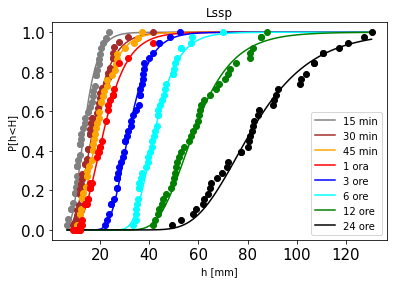

In [92]:
grafici_sovr(data["15 min"],data['30 min'],data['45 min'],data['1 ora'],data['3 ore'],data['6 ore'],data['12 ore'],data['24 ore'], 'h [mm]','P[h<H]','Lssp')

Come si nota dai grafici la pendenza delle curve di possibilità pluviometrica riferite a durate sub-orarie risulta molto elevata rispetto le altre curve, questo aspetto risulta correlato alla variazione dei valori delle altezze di pioggia massime rilevati per quegli intervalli.

Come si evince dal grafico soottostante la varianza associata ai dati relativi alle varie durate aumenta assieme all'aumento della durata dell'intervallo di interesse.  

<AxesSubplot:title={'center':'varianza'}, xlabel='durata', ylabel='altezza [mm]'>

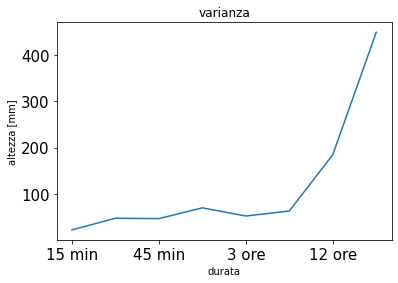

In [93]:
variances.plot(xlabel=('durata'),ylabel=('altezza [mm]'),title=('varianza'))